In [1]:
import os
import math
import operator
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from textblob import TextBlob
from gsdmm import MovieGroupProcess

## This is a notebook to performs topic modeling on a subset of data
The data is subset around quarantine (based on positive sentiment in these texts)

Output from this notebook is not used in the project report.

## pre-processed text

In [2]:
# data = pd.read_pickle("../../../sampled_processed_extant_posts.pkl")
data = pd.read_pickle("../../../sampled_processed_extant_posts.pkl")

In [3]:
print(f"rows in data: {len(data)}")

rows in data: 2695354


In [4]:
data.head()

,text_clean_space,text_clean_punc_lower,len_clean,tokens,tokens_clean,tokens_lemma,bigrams,trigrams
1021188,"Hmmm. Interesting. See, not so sophisticated hah.",hmmm interesting see not so sophisticated hah,45,"[hmmm, interesting, see, not, so, sophisticate...","[hmmm, interesting, see, sophisticated, hah]","[hmmm, interesting, see, sophisticated, hah]","[(hmmm, interesting), (interesting, see), (see...","[(hmmm, interesting, see), (interesting, see, ..."
9531089,Thank you!!! I love you!!!,thank you i love you,20,"[thank, you, i, love, you]","[thank, love]","[thank, love]","[(thank, love)]",[]
2720963,You do realise you're contradicting yourself r...,you do realise youre contradicting yourself right,49,"[you, do, realise, youre, contradicting, yours...","[realise, contradicting, right]","[realise, contradicting, right]","[(realise, contradicting), (contradicting, rig...","[(realise, contradicting, right)]"
9086559,"Per the below comments, it will vary. That sai...",per the below comments it will vary that said ...,164,"[per, the, below, comments, it, will, vary, th...","[per, comments, vary, said, would, expect, cou...","[per, comment, vary, said, would, expect, coul...","[(per, comment), (comment, vary), (vary, said)...","[(per, comment, vary), (comment, vary, said), ..."
9102373,,,0,[],[],[],[],[]


## full data with dates

In [5]:
posts_pkl_path = os.path.join('..', '..', '..', "combined_bigquery_processed.pkl")
posts_df = pd.read_pickle(posts_pkl_path)

#### merge data

In [6]:
data = data.merge(posts_df, left_index = True, right_index = True, how = 'left')

In [7]:
data['date'] = pd.to_datetime(data['created_date'], format='%Y-%m-%d')
data['date'] = data['date'].dt.date

#### subset to june/july date range

In [8]:
subset_date2 = data[(data['date']>= datetime.strptime('2019-06-26', '%Y-%m-%d').date())
     & (data['date']<= datetime.strptime('2019-07-10', '%Y-%m-%d').date())]

In [9]:
print(subset_date2.shape)
subset_date2.head()

(120013, 31)


,text_clean_space,text_clean_punc_lower,len_clean,tokens,tokens_clean,tokens_lemma,bigrams,trigrams,selftext,score_hidden,...,controversiality,gilded,id,subreddit,ups,distinguished,author_flair_css_class,created_date,post_type,date
3195563,idk i can't even remember the last time i used...,idk i cant even remember the last time i used ...,159,"[idk, i, cant, even, remember, the, last, time...","[idk, cant, even, remember, last, time, used, ...","[idk, cant, even, remember, last, time, used, ...","[(idk, cant), (cant, even), (even, remember), ...","[(idk, cant, even), (cant, even, remember), (e...",idk i can't even remember the last time i used...,NaN,...,0,0,etaeugw,The_Donald,NaN,NaN,treadonme,2019-07-08,extant,2019-07-08
4205198,One pede checking in.,one pede checking in,20,"[one, pede, checking, in]","[one, pede, checking]","[one, pede, checking]","[(one, pede), (pede, checking)]","[(one, pede, checking)]",One pede checking in.,NaN,...,0,0,es4foow,The_Donald,NaN,NaN,MURICA,2019-06-26,extant,2019-06-26
3831477,He hopes that the'll have a mercy if they get ...,he hopes that thell have a mercy if they get t...,67,"[he, hopes, that, thell, have, a, mercy, if, t...","[hopes, thell, mercy, get, hands, lol]","[hope, thell, mercy, get, hand, lol]","[(hope, thell), (thell, mercy), (mercy, get), ...","[(hope, thell, mercy), (thell, mercy, get), (m...",He hopes that the'll have a mercy if they get ...,NaN,...,0,0,esdtbpz,The_Donald,NaN,NaN,NaN,2019-06-29,extant,2019-06-29
3148898,TRUE: didnt see any that were very clever at a...,true didnt see any that were very clever at all,48,"[true, didnt, see, any, that, were, very, clev...","[true, see, clever]","[true, see, clever]","[(true, see), (see, clever)]","[(true, see, clever)]",TRUE: didnt see any that were very clever at a...,NaN,...,0,0,et3apf8,The_Donald,NaN,NaN,kekistan,2019-07-06,extant,2019-07-06
3178475,"If you really want to make that argument, Ashk...",if you really want to make that argument ashke...,256,"[if, you, really, want, to, make, that, argume...","[really, want, make, argument, ashkenazi, jews...","[really, want, make, argument, ashkenazi, jew,...","[(really, want), (want, make), (make, argument...","[(really, want, make), (want, make, argument),...","If you really want to make that argument, Ashk...",NaN,...,0,0,ethdb2p,The_Donald,NaN,NaN,MURICA,2019-07-10,extant,2019-07-10


In [10]:
del data

In [11]:
subset_date2 = subset_date2 [subset_date2['author']!='AutoModerator']
subset_date2.shape

(119268, 31)

# short text lda model

### review vocab for date range

In [12]:
vocab_counts = {}
token_length = {}
sample_data = subset_date2['bigrams']
for token_list in sample_data:
    for token in token_list:
        token_length[token] = len(token)
        vocab_counts[token] = vocab_counts.get(token, 0) + 1

In [13]:
sorted_vocab_counts = dict( sorted(vocab_counts.items(), key=operator.itemgetter(1),reverse=True))
# print('Dictionary in descending order by value : ', sorted_vocab_counts)
# like, would, see, get , im, thats, may, got, 

In [14]:
sorted_vocab_len = dict( sorted(token_length.items(), key=operator.itemgetter(1),reverse=True))
# print('Dictionary in descending order by value : ', sorted_vocab_len)

In [15]:
sorted_vocab_counts

{('look', 'like'): 1107,
 ('united', 'state'): 936,
 ('gon', 'na'): 802,
 ('make', 'sure'): 755,
 ('im', 'sure'): 600,
 ('let', 'make'): 549,
 ('everyone', 'get'): 544,
 ('year', 'ago'): 542,
 ('sure', 'everyone'): 526,
 ('every', 'centipede'): 525,
 ('get', 'patriot'): 524,
 ('state', 'every'): 519,
 ('love', 'god'): 485,
 ('president', 'trump'): 472,
 ('god', 'get'): 471,
 ('free', 'speech'): 470,
 ('sound', 'like'): 465,
 ('social', 'medium'): 412,
 ('trump', 'train'): 410,
 ('build', 'wall'): 406,
 ('trump', 'supporter'): 393,
 ('fake', 'news'): 385,
 ('got', 'ta'): 357,
 ('texas', 'let'): 350,
 ('year', 'old'): 344,
 ('get', 'brick'): 337,
 ('brick', 'every'): 333,
 ('every', 'brick'): 332,
 ('mile', 'wide'): 332,
 ('foot', 'high'): 332,
 ('centipede', 'brick'): 331,
 ('brick', 'centipede'): 331,
 ('brick', 'handed'): 330,
 ('goal', 'build'): 330,
 ('wall', 'starting'): 330,
 ('starting', 'imperial'): 330,
 ('imperial', 'beach'): 330,
 ('beach', 'ca'): 330,
 ('ca', 'brownsville'):

In [16]:
vocab_data = [[k, v,] for k, v in sorted_vocab_counts.items()]
vocab_df = pd.DataFrame(vocab_data[0:20], columns=["bigram", "Freq"])

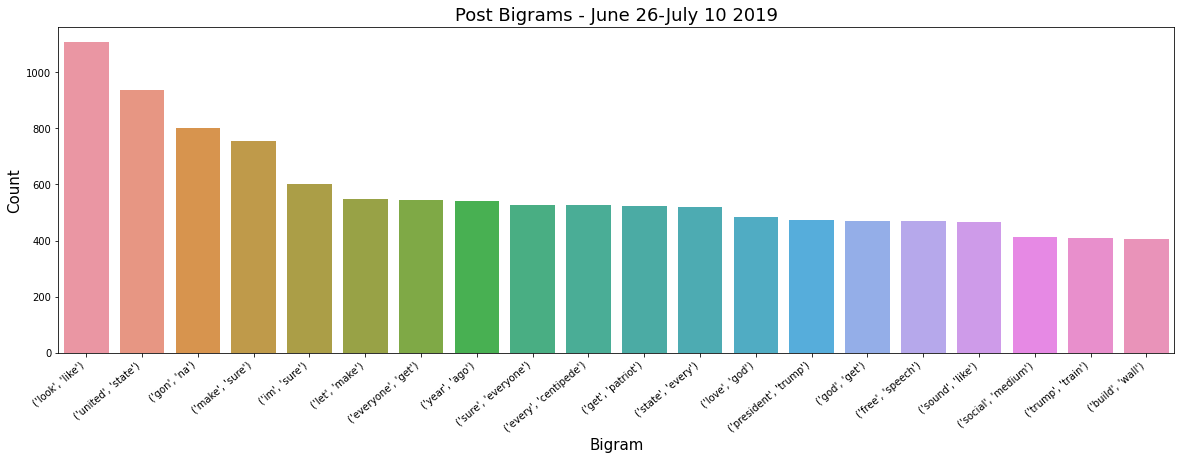

In [17]:
plt.figure(figsize=(20,6))
p = sns.barplot(x='bigram', y='Freq',
            data=vocab_df)
p.set_xticklabels(p.get_xticklabels(), rotation=40, ha="right")
plt.ylabel("Count", size=15)
plt.xlabel("Bigram", size=15)
plt.title("Post Bigrams - June 26-July 10 2019", size=18)
plt.show()

In [18]:
vocab_size = len(vocab_counts)
print(f"vocab size {vocab_size}")

vocab size 806152


## train topic model

In [19]:
# Init of the Gibbs Sampling Dirichlet Mixture Model algorithm
mgp = MovieGroupProcess(K=10, alpha=0.1, beta=0.8, n_iters=50)

In [20]:
fit1 = mgp.fit(sample_data , vocab_size)

In stage 0: transferred 103880 clusters with 10 clusters populated
In stage 1: transferred 91305 clusters with 10 clusters populated
In stage 2: transferred 82086 clusters with 10 clusters populated
In stage 3: transferred 74765 clusters with 10 clusters populated
In stage 4: transferred 69689 clusters with 10 clusters populated
In stage 5: transferred 66927 clusters with 10 clusters populated
In stage 6: transferred 65566 clusters with 10 clusters populated
In stage 7: transferred 64824 clusters with 10 clusters populated
In stage 8: transferred 64459 clusters with 10 clusters populated
In stage 9: transferred 63972 clusters with 10 clusters populated
In stage 10: transferred 63711 clusters with 10 clusters populated
In stage 11: transferred 63402 clusters with 10 clusters populated
In stage 12: transferred 63544 clusters with 10 clusters populated
In stage 13: transferred 63632 clusters with 10 clusters populated
In stage 14: transferred 63648 clusters with 10 clusters populated
In s

In [21]:
doc_count = np.array(mgp.cluster_doc_count)
print('Number of documents per topic :', doc_count)

Number of documents per topic : [ 4674  4436  6309  6629  4825  4554  5920 63486  4930 13505]


In [22]:
# Topics sorted by the number of document they are allocated to
top_index = doc_count.argsort()[-7:][::-1]
print('Most important clusters (by number of docs inside):', top_index)

Most important clusters (by number of docs inside): [7 9 3 2 6 8 4]


In [23]:
def top_words(cluster_word_distribution, top_cluster, values):
    for cluster in top_cluster:
        sort_dicts =sorted(mgp.cluster_word_distribution[cluster].items(), key=lambda k: k[1], reverse=True)[:values]
        print('Cluster %s : %s'%(cluster,sort_dicts))
        print(' — — — — — — — — — ')

In [25]:
top_words(mgp.cluster_word_distribution, top_index, 20)

Cluster 7 : [(('look', 'like'), 919), (('gon', 'na'), 701), (('im', 'sure'), 461), (('sound', 'like'), 381), (('president', 'trump'), 340), (('year', 'ago'), 323), (('got', 'ta'), 321), (('fake', 'news'), 316), (('free', 'speech'), 295), (('trump', 'supporter'), 291), (('god', 'bless'), 281), (('social', 'medium'), 257), (('call', 'violence'), 248), (('ive', 'seen'), 241), (('year', 'old'), 237), (('orange', 'man'), 228), (('feel', 'like'), 220), (('seems', 'like'), 219), (('condone', 'violence'), 219), (('pretty', 'sure'), 204)]
 — — — — — — — — — 
Cluster 9 : [(('united', 'state'), 270), (('illegal', 'alien'), 202), (('illegal', 'immigrant'), 175), (('open', 'border'), 163), (('free', 'speech'), 155), (('year', 'ago'), 148), (('free', 'healthcare'), 142), (('social', 'medium'), 131), (('health', 'care'), 111), (('supreme', 'court'), 111), (('many', 'people'), 108), (('president', 'trump'), 103), (('citizenship', 'question'), 102), (('look', 'like'), 100), (('american', 'citizen'), 99

In [26]:
# mgp.choose_best_label(list(sample_data)[1])
best_labels = sample_data.apply(lambda row: mgp.choose_best_label(row))
best_labels 

3195563     (7, 0.9999997866032042)
4205198      (7, 0.457347627978485)
3831477     (4, 0.6818883509901956)
3148898    (7, 0.37498587259718585)
3178475     (2, 0.9999925197638087)
                     ...           
2566786     (2, 0.6712089609087057)
2751490     (7, 0.9999997991927017)
3133201                    (0, 0.0)
2812400     (9, 0.8785252208772426)
3436089                    (0, 0.0)
Name: bigrams, Length: 119268, dtype: object

In [27]:
sample_df = sample_data.to_frame()
best_labels = best_labels.to_frame()
sample_df = sample_df.merge(best_labels, left_index=True, right_index=True)
sample_df.head()

,bigrams_x,bigrams_y
3195563,"[(idk, cant), (cant, even), (even, remember), ...","(7, 0.9999997866032042)"
4205198,"[(one, pede), (pede, checking)]","(7, 0.457347627978485)"
3831477,"[(hope, thell), (thell, mercy), (mercy, get), ...","(4, 0.6818883509901956)"
3148898,"[(true, see), (see, clever)]","(7, 0.37498587259718585)"
3178475,"[(really, want), (want, make), (make, argument...","(2, 0.9999925197638087)"


In [28]:
sample_df['best_label'] = sample_df['bigrams_y'].apply(lambda row:row[0])
sample_df['best_label_prob'] = sample_df['bigrams_y'].apply(lambda row:row[1])
sample_df.head()

,bigrams_x,bigrams_y,best_label,best_label_prob
3195563,"[(idk, cant), (cant, even), (even, remember), ...","(7, 0.9999997866032042)",7,1.000000
4205198,"[(one, pede), (pede, checking)]","(7, 0.457347627978485)",7,0.457348
3831477,"[(hope, thell), (thell, mercy), (mercy, get), ...","(4, 0.6818883509901956)",4,0.681888
3148898,"[(true, see), (see, clever)]","(7, 0.37498587259718585)",7,0.374986
3178475,"[(really, want), (want, make), (make, argument...","(2, 0.9999925197638087)",2,0.999993


In [29]:
result = sample_df.merge(subset_date2, left_index=True, right_index = True)

In [30]:
result_restricted = result[['best_label', 'best_label_prob', 'text_clean_space', 'date']]
result_restricted.head()

,best_label,best_label_prob,text_clean_space,date
3195563,7,1.000000,idk i can't even remember the last time i used...,2019-07-08
4205198,7,0.457348,One pede checking in.,2019-06-26
3831477,4,0.681888,He hopes that the'll have a mercy if they get ...,2019-06-29
3148898,7,0.374986,TRUE: didnt see any that were very clever at a...,2019-07-06
3178475,2,0.999993,"If you really want to make that argument, Ashk...",2019-07-10


In [31]:
topic_0 = result_restricted[result_restricted['best_label']==0]
topic_1 = result_restricted[result_restricted['best_label']==1]
topic_2 = result_restricted[result_restricted['best_label']==2]
topic_3 = result_restricted[result_restricted['best_label']==3]
topic_4 = result_restricted[result_restricted['best_label']==4]

In [32]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)
topic_3.sort_values('best_label_prob', ascending = False).head(20)

<ipython-input-32-a47161039979>:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


,best_label,best_label_prob,text_clean_space,date
2686148,3,1.0,"&gt;I believe in American exceptionalism, just as I suspect that the Brits believe in British exceptionalism and the Greeks believe in Greek exceptionalism. - Kenyan 0bummer &amp;nbsp; ^[Disclaimer: ^This ^comment ^does ^not ^condone, ^endorse ^or ^incite ^violence ^in ^any ^way, ^shape ^or ^form.]",2019-07-05
3440978,3,1.0,"#[WE JUST CAN'T STOP WINNING, FOLKS! THE TRUMP TRAIN JUST GOT 10 BILLION MPH FASTER!](https://www.youtube.com/watch?v=hgM2xN5TPgw#196849385117000) #CURRENT SPEED: 329,609,385,117,000 MPH! At that rate, it would take approximately 5.091 years to travel to the Andromeda Galaxy (2.5 million light-years)!",2019-06-30
2549360,3,1.0,"#[WE JUST CAN'T STOP WINNING, FOLKS! THE TRUMP TRAIN JUST GOT 10 BILLION MPH FASTER!](https://www.youtube.com/watch?v=hgM2xN5TPgw#196849385117000) #CURRENT SPEED: 331,779,385,117,000 MPH! At that rate, it would take approximately 5.058 years to travel to the Andromeda Galaxy (2.5 million light-years)!",2019-07-07
3046620,3,1.0,"Fire up the Trump Train, and eventually it will be traveling back through time so fast when approaching the Andromeda Galaxy that it'll just wrap right around the universe and you'll be right back here(where you belong) along with the other time traveler, Master Kenobi Barron Trump. Barron is actually Don's great-great-great-great-great-great-...(28 greats later)...-grandson. Come back to lead his grandpapa\^34 to victory! He's also helping Bill &amp; Ted while he's at it - he's a master multi-tasker. The best multi-tasker ever. Believe me!",2019-07-01
3421393,3,1.0,"Insane progressives ruin everything. Insane progressives destroyed FEMINISM and twisted it into a DEGENERATE, hate-filled, anti-traditional family dumpster fire. THIS is how we raise our girls. (Cropped to protect her.) https://magaimg.net/img/5u9i.jpg No one in THIS fam would be caught dead dressed as a giant felt vagina. &amp;nbsp; In the same way, insane progressives have DESTROYED the LGBT movement. It's garbage. And just like modern feminism HURTS women, modern LGBT activism hurts gays.",2019-06-28
2573590,3,1.0,"#[WE JUST CAN'T STOP WINNING, FOLKS! THE TRUMP TRAIN JUST GOT 10 BILLION MPH FASTER!](https://www.youtube.com/watch?v=hgM2xN5TPgw#196849385117000) #CURRENT SPEED: 329,639,385,117,000 MPH! At that rate, it would take approximately 5.091 years to travel to the Andromeda Galaxy (2.5 million light-years)!",2019-06-30
3416100,3,1.0,"#[WE JUST CAN'T STOP WINNING, FOLKS! THE TRUMP TRAIN JUST GOT 10 BILLION MPH FASTER!](https://www.youtube.com/watch?v=hgM2xN5TPgw#196849385117000) #CURRENT SPEED: 328,459,385,117,000 MPH! At that rate, it would take approximately 5.109 years to travel to the Andromeda Galaxy (2.5 million light-years)!",2019-06-29
3355631,3,1.0,"#[WE JUST CAN'T STOP WINNING, FOLKS! THE TRUMP TRAIN JUST GOT 10 BILLION MPH FASTER!](https://www.youtube.com/watch?v=hgM2xN5TPgw#196849385117000) #CURRENT SPEED: 328,569,385,117,000 MPH! At that rate, it would take approximately 5.107 years to travel to the Andromeda Galaxy (2.5 million light-years)!",2019-06-29
3359847,3,1.0,"#[WE JUST CAN'T STOP WINNING, FOLKS! THE TRUMP TRAIN JUST GOT 10 BILLION MPH FASTER!](https://www.youtube.com/watch?v=hgM2xN5TPgw#196849385117000) #CURRENT SPEED: 325,759,385,117,000 MPH! At that rate, it would take approximately 5.151 years to travel to the Andromeda Galaxy (2.5 million light-years)!",2019-06-27
2583797,3,1.0,"#[WE JUST CAN'T STOP WINNING, FOLKS! THE TRUMP TRAIN JUST GOT 10 BILLION MPH FASTER!](https://www.youtube.com/watch?v=hgM2xN5TPgw#196849385117000) #CURRENT SPEED: 332,369,385,117,000 MPH! At that rate, it would take approximately 5.049 years to travel to the Andromeda Galaxy (2.5 million light-years)!",2019-07-10


In [33]:
topic_0.sort_values('best_label_prob', ascending = False).head(20)

,best_label,best_label_prob,text_clean_space,date
4035698,0,1.0,ray-gun was a failed mediocre president. gave missiles and WMDs to iran and iraq iran-contra helped china create their space program (and ICBMs) by giving them our satellites to launch from chinese territory bribed hezbollah/iran in exchange for hostages started NAFTA and supported the 'north america union' anti-2A the worst immigration bill ever (1986 amnesty for 4 million illegals),2019-06-28
2871761,0,1.0,"Umm...Trump never grabbed anyones pussy...he just said women would allow it. Good old male chest pounding. Biden inappropriately touches little girls (seldom if ever boys). And does so often and in front of cameras. Even if Trump did grab pussy (assuming it was allowed) it would be with an adult. Men...grown men, should not be kissing and sniffing girls....EVER!! Now...in this photo, its a granddaughter...so that is kind of okay except for the fact that...its more creepy than what even granddads should be doing. And again...mostly only girls.",2019-07-09
3227806,0,1.0,"Imagine a nice hotel that holds 1,000 guests and suddenly they have no choice to take in and house/feed TEN TIMES that amount. The challenge of people everywhere, not enough food, bathroom facilities overwhelmed, etc. and NO HELP financially to assist and meet their needs....check in on the conditions in that lobby weeks later and OF COURSE there will be ""issues"". AND CONGRESS DOES NOTHING except blame Border Patrol/ICE, etc. As for the photo in this article...who even knows if it is legit when MANY photos they have used in the past are from the Obama years or elsewhere.",2019-07-02
3122677,0,1.0,"And now you know why leftists are trying to dismantle and erase the foundation of America... One interesting thing to note is this; when nations and people's pushed God out of their lives, homes, and towns, God withdrew his protective hand from them, their lands, and most important, their minds and hearts. In doing so, peoples minds became corrupt, hearts grew cold, and God let them fall into their own desires and lusts. But that only happened when the people rejected God, following after their own desires instead. Something I found interesting to consider, given the current climate.",2019-07-04
2504171,0,1.0,"In the beauty of the lilies Christ was born across the sea With a glory in His bosom that transfigures you and me **As He died to make men holy, let us die to make men free While God is marching on** Glory, glory, hallelujah! Glory, glory, hallelujah! Glory, glory, hallelujah! While God is marching on",2019-07-04
2659660,0,1.0,"Just graduated nursing school last May, courtesy of the Marines and GI Bill. No shit in our community health class we had a lecturer (Nurse Practitioner) come in to talk about the gender bullshit. 100 genders, never misgender, and she says not to refer to the genitals by name. She calls them front hole and back hole. It was fucking insane and there were plenty of people just nodding along. I wish I was fucking kidding. Soez: holy fucking stroke Batman, I need to check my autocorrects.",2019-07-10
4037573,0,1.0,ray-gun was a failed mediocre president. gave missiles and WMDs to iran and iraq iran-contra helped china create their space program (and ICBMs) by giving them our satellites to launch from chinese territory bribed hezbollah/iran in exchange for hostages started NAFTA and supported the 'north america union' anti-2A the worst immigration bill ever (1986 amnesty for 4 million illegals),2019-06-28
3116157,0,1.0,"right. you're talking about the white supremacists online who claim 'muh poor german soldiers who were killed by ike after WWII', right? that wasn't eisenhower's fault. that was TRUMAN'S fault. why don't people blame truman for the hundreds of thousands of german soldiers and civilians who died in the internment camps after WWII? wtf could eisenhower do when he had no money to make those camps more liveable and couldn't free them without truman's orders? mars

In [34]:
topic_1.sort_values('best_label_prob', ascending = False).head(20)

,best_label,best_label_prob,text_clean_space,date
3067039,1,1.0,"**FOR THE LOVE OF GOD GET THIS PATRIOT A BRICK! THAT'S 148137 BRICKS HANDED OUT!** We are at **20.8649041797797690032406496%** of our goal to **BUILD THE WALL** starting from Imperial Beach, CA to Brownsville, Texas! Let's make sure everyone gets a brick in the United States! For every Centipede a brick, for every brick a Centipede! At this rate, the wall will be **1628.92095583967588716299444 MILES WIDE** and **434.121999471149911968322089 FEET HIGH** by tomorrow! **DO YOUR PART!**",2019-06-30
2744436,1,1.0,"#[QUAD DAMAGE!](https://www.youtube.com/watch?v=uG6oBC0Ym5c) #**FOUR BRICKS! FOOOOOOOOUUUUUUR! LADIES AND GENTLEMEN, THIS CENTIPEDE IS ABOUT TO DOMINATE!!!** **THAT'S 148194 BRICKS HANDED OUT!** We are at **20.8729325557982346589052352%** of our goal to **BUILD THE WALL** starting from Imperial Beach, CA to Brownsville, Texas! Lets make sure everyone gets a brick in the United States! For every Centipede a brick, for every brick a Centipede! At this rate, the wall will be **1629.54773034221651864309928 MILES WIDE** and **434.289040480282374114728418 FEET HIGH** by tomorrow! **DO YOUR PART!**",2019-06-30
2900109,1,1.0,"The emoluments clause, also called the foreign emoluments clause, is a provision of the U.S. Constitution (Article 1, Section 9, Paragraph 8) that generally prohibits federal officeholders from receiving any gift, payment, or other thing of value from a foreign state or its rulers, officers, or representatives. The clause provides that: No title of Nobility shall be granted by the United States: And no Person holding any Office of Profit or Trust under them, shall, without the Consent of the Congress, accept of any present, Emolument, Office, or Title, of any kind whatever, from any King, Prince, or foreign State.",2019-07-02
2903090,1,1.0,"**FOR THE LOVE OF GOD GET THIS PATRIOT A BRICK! THAT'S 148480 BRICKS HANDED OUT!** We are at **20.9132152845926412820643840%** of our goal to **BUILD THE WALL** starting from Imperial Beach, CA to Brownsville, Texas! Let's make sure everyone gets a brick in the United States! For every Centipede a brick, for every brick a Centipede! At this rate, the wall will be **1632.69259889882389764853760 MILES WIDE** and **435.127176069964552603714560 FEET HIGH** by tomorrow! **DO YOUR PART!**",2019-07-02
3175856,1,1.0,"**FOR THE LOVE OF GOD GET THIS PATRIOT A COAT! THATS 205,924 COATS HANDED OUT!** We are 58.71% of our goal to coat the 350,742 great people of Anaheim, California. Let's make sure everyone gets a coat in the United States! For every Centipede a coat, for every coat a Centipede! This bot was created by devious1087, feedback always welcome. [Meme Reference!](https://youtu.be/OiYVVT1aQFM)",2019-06-30
4080027,1,1.0,"**FOR THE LOVE OF GOD GET THIS PATRIOT A COAT! THATS 205,684 COATS HANDED OUT!** We are 68.86% of our goal to coat the 298,695 great people of Anchorage, Alaska. Let's make sure everyone gets a coat in the United States! For every Centipede a coat, for every coat a Centipede! This bot was created by devious1087, feedback always welcome. [Meme Reference!](https://youtu.be/OiYVVT1aQFM)",2019-06-28
2621366,1,1.0,"**FOR THE LOVE OF GOD GET THIS PATRIOT A BRICK! THAT'S 148614 BRICKS HANDED OUT!** We are at **20.9320890106711394901179712%** of our goal to **BUILD THE WALL** starting from Imperial Beach, CA to Brownsville, Texas! Let's make sure everyone gets a brick in the United States! For every Centipede a brick, for every brick a Centipede! At this rate, the wall will be **1634.16606878198959270702968 MILES WIDE** and **435.519868968626832035617158 FEET HIGH** by tomorrow! **DO YOUR PART!**",2019-07-03
4091931,1,1.0,"**FOR THE LOVE OF GOD GET THIS PATRIOT A COAT! THATS 205,819 COATS HANDED OUT!** We are 85.71% of our goal to coat the 240,126 great people of Glendale, Arizona. Let's make sure everyone gets a coat in the United States! For every Centipede a coat, for every coat a Centipede! This bot

In [35]:
topic_2.sort_values('best_label_prob', ascending = False).head(20)

,best_label,best_label_prob,text_clean_space,date
3448008,2,1.0,"&gt; HOW IS THIS HAPPENING IN AMERICA??? The UN is removing that. In place of the USA, there are areas for commies, for muslims, for other muslims, for Guatemalans, and so on. Just check most Canadian cities, no areas for Canadians. This is the future of the USA, and Europe. Portland, Oregon is a place, only, for anarchist terrorists. Didn't Portland import some women from Oakland to be the ""leader"" of their police? Not the place you want to emulate. Need to boycott the UN-affiliated cities, and even then you will still have to pay for them as they go bankrupt under communism and legal mass immigration and then demand US taxpayers fund them.",2019-06-29
3157068,2,1.0,"Conclusion The above studies indicate that the terminology zero emission is a misnomer when referring to electric vehicles. Also, lawmakers should be cautious about subsidizing electric vehicles when their electricity is generated mainly by fossil fuels because they are not lowering the carbon dioxide emissions from automobiles by doing so. The old saying that the road to hell is paved with good intentions may well apply to many of the gimmicks and work-arounds advocated by whatever group is popular with a political and media elite at any given time. **Germanys lessons should be a case study for political leaders everywhere.**",2019-07-09
3985405,2,1.0,"That sounds about right. They blame us for cleaning up their problems, they blame us for not cleaning them up when they've fallen out of favor, and they champion causes they clearly don't understand. There was a point around the Clinton-era where the party's ideals were soundly structured. You didn't have to agree with them, but they made sense as part of a larger whole. That all unraveled around 2007-2008 when the party started supporting positions that pre-Clinton Democrats would have rallied against. Positions that negatively impacted more traditional Democratic positions.",2019-06-27
4014334,2,1.0,"No, they're right, it's not necessarily assault. Throwing milkshakes at someone is assault if they're put in reasonable apprehension of imminent unlawful contact by a party acting intentionally. If you're not looking when it happens, it's not assault. However, throwing milkshakes that hit IS always battery. The intentional application of unlawful force in a matter that is harmful or offensive to the average person. Force can be applied indirectly, as in poisoning someone or sabotaging a car's brakes, but DEFINITELY when throwing objects.",2019-06-30
3217452,2,1.0,"Dumbest thing I heard in high school, oh so many moons ago was a study group in the library. You know that thing where for whatever reason your brain just *stops* filtering out background noise at just the right time for you to overhear a single sentence? The sentence I heard was ""...and then Chaka Khan led the mongols into eastern Europe. How I long for the days when the height of stupidity was funny, instead of just downright sad.",2019-07-02
4203148,2,1.0,"no prob, I had to explain what kind of ""trans"" I was to my dad. It was basically the same question. I just told him that I have the same personality that I have in girl mode that I have in guy mode. I am pretty low key. I told him that when out it girl mode I dont have this big inflated ego of a character like people tend to think of when you say transgender. I am the same person that he knows. It put him a little more at ease, but not much. There are quite a few Conservative trans girls out there, a lot of them enlist in the armed forces after high school thinking it will solve their situation when later they give in and accept that they are transgender.",2019-06-26
4115070,2,1.0,"Who told you? Seriously, investigating one kerffluffel after another over somebody claiming DJT did something awful, is how I wound up voting for him. There were so many over-the-top lies, I got acquainted with what he really said and did. My favorite is 

### LDA

In [36]:
import gensim
import gensim.corpora as corpora

/Users/christineibaraki/Documents/workspace/RedditQuarantineNLP/env/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [40]:
id2word = corpora.Dictionary(subset_date2['tokens_lemma'])
print('Making corpus...')
corpus = [id2word.doc2bow(text) for text in subset_date2['tokens_lemma']]

lda = gensim.models.LdaMulticore(corpus = corpus, id2word = id2word,
                                     num_topics =15, workers = 3,
                                     passes=10, iterations=100, random_state=0, eval_every=None)

/Users/christineibaraki/Documents/workspace/RedditQuarantineNLP/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Making corpus...


In [41]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

/Users/christineibaraki/Documents/workspace/RedditQuarantineNLP/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
gensimvis.prepare(lda, corpus, id2word)

/Users/christineibaraki/Documents/workspace/RedditQuarantineNLP/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.183187 -0.055154  1       1        16.848610
1      0.120711 -0.103890  2       1        11.669250
6      0.121809  0.053778  3       1        8.760264 
8      0.144317 -0.062672  4       1        8.318421 
5      0.100669 -0.068143  5       1        7.060069 
13     0.045625  0.034540  6       1        6.587831 
12     0.071484  0.055277  7       1        6.345742 
3      0.051227  0.141804  8       1        6.106545 
0      0.039940  0.061463  9       1        5.617626 
11     0.058463 -0.039827  10      1        5.198161 
7      0.001360  0.000659  11      1        4.798004 
10    -0.299386 -0.215704  12      1        3.554622 
4     -0.204485 -0.175555  13      1        3.410078 
9     -0.159558  0.185044  14      1        3.144939 
14    -0.275361  0.188381  15      1        2.579838 , topic_info=       Term         Freq        Total Category  logprob  loglift
172  trump   8623.000000  8623.000000  Default  30.0000  30.0000
253  im      6184.000000  6184.000000  Default  29.0000  29.0000
645  love    3186.000000  3186.000000  Default  28.0000  28.0000
420  reddit  3060.000000  3060.000000  Default  27.0000  27.0000
558  year    4210.000000  4210.000000  Default  26.0000  26.0000
..    ...            ...          ...      ...      ...      ...
0    cant    724.127738   3850.380238  Topic15 -3.9019   1.9865 
28   true    408.727694   1326.720207  Topic15 -4.4739   2.4800 
396  would   797.243239   7888.552860  Topic15 -3.8058   1.3654 
172  trump   709.902616   8623.939810  Topic15 -3.9218   1.1603 
993  100     262.921926   727.555536   Topic15 -4.9151   2.6396 

[942 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
819   15     0.998495  10     
993   1      0.053604  100    
993   2      0.145693  100    
993   4      0.144319  100    
993   5      0.147068  100    
...  ..           ...  ...    
209   11     0.000653  yes    
209   14     0.022866  yes    
1556  10     0.142183  youtube
1556  11     0.855320  youtube
1543  4      0.996923  yup    

[2408 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 7, 9, 6, 14, 13, 4, 1, 12, 8, 11, 5, 10, 15])